Voici le code que nous avons développé durant ce projet afin de créer et entrainer un réseau convolutionnel pour notre problème.

# Projet

Ce code sera séparé en plusieurs parties expliquant rapidement le but de chaque fragment de code.

## Librairie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import math
from __future__ import absolute_import, division, print_function
import os
import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell
import pandas as pd

## Téléchargement des fichiers contenant les données

Dû à un mauvais calibrage des capteurs nous devons faire un premier traitement des données afin de rendre les traitement à venir plus facile.

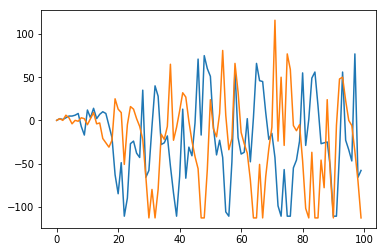

In [2]:
data10 = np.loadtxt("MarcheAlex.txt")
min_G = data10[0,0]
min_D = data10[0,1]
for i in range(data10.shape[0]):
    data10[i,0] = data10[i,0]-min_G
    data10[i,1] = data10[i,1]-min_D

data11 = np.loadtxt("CourseAlex.txt")
min_G = data11[0,0]
min_D = data11[0,1]
for i in range(data11.shape[0]):
    data11[i,0] = data11[i,0]-min_G
    data11[i,1] = data11[i,1]-min_D
    
data = np.loadtxt("Marche.txt")
min_G = data[0,1]
min_D = data[0,2]
for i in range(data.shape[0]):
    data[i,1] = data[i,1]-min_G
    data[i,2] = data[i,2]-min_D
    
data2 = np.loadtxt("Course.txt")
min_G = data2[0,1]
min_D = data2[0,2]
for i in range(data2.shape[0]):
    data2[i,1] = data2[i,1]-min_G
    data2[i,2] = data2[i,2]-min_D
    
# On affiche la forme des données
plt.plot(data2[:100,1])
plt.plot(data2[:100,2])
plt.show()

## Fonction de lissage

Afin de rendre le signal d'entrée plus facilement traitable en enlevant les bruits créés par les capteurs nous avons définit une fonction de lissage sur le principe de la moyenne glissante.

In [3]:
def lissage(Ly,p):
    '''Fonction qui débruite une courbe par une moyenne glissante
    sur 2P+1 points'''
    Lyout=[]
    for i in range(p,Ly.shape[0]-p):
        val=0
        for k in range(2*p):
            val+=Ly[i-p+k]
        Lyout.append(val/2/p)
    Lyout.append(0)
    Lyout.append(0) 
    return Lyout

### Lissage des données

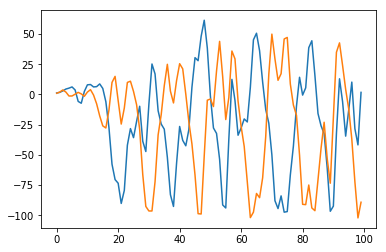

In [4]:
buff = data[:,1]
buff = lissage(buff,1)
data[:,1]=np.array(lissage(np.array(buff),1))
buff = data[:,2]
buff = lissage(buff,1)
data[:,2]=np.array(lissage(np.array(buff),1))

buff = data2[:,1]
buff = lissage(buff,1)
data2[:,1]=np.array(lissage(np.array(buff),1))
buff = data2[:,2]
buff = lissage(buff,1)
data2[:,2]=np.array(lissage(np.array(buff),1))

buff = data10[:,0]
buff = lissage(buff,1)
data10[:,0]=np.array(lissage(np.array(buff),1))
buff = data10[:,1]
buff = lissage(buff,1)
data10[:,1]=np.array(lissage(np.array(buff),1))

buff = data11[:,0]
buff = lissage(buff,1)
data11[:,0]=np.array(lissage(np.array(buff),1))
buff = data11[:,1]
buff = lissage(buff,1)
data11[:,1]=np.array(lissage(np.array(buff),1))

# On affiche la forme des données lissées
plt.plot(data2[:100,1])
plt.plot(data2[:100,2])
plt.show()

## Découpage des données pour entrainement du réseau

Afin d'entrainer notre réseau de neurones nous avons besoin de découper notre signal afin de créer une base de données qui nous servira pour la suite du projet.

Nous avons essayé plusieurs solutions qui seront présentées ci-dessous:

### Premier découpage

La première solution consiste à découper le signal grace à des seuils prédifinits. Puis on stocke le signal découpé dans une liste afin de les récupérer par la suite.

In [5]:
def compute_data(data,liste,num):
    var1 = 0
    var2 = 0
    var3 = 0
    var4 = 0
    var5 = 0
    var6 = 0
    var7 = 0
    var8 = 0
    j = 0
    data4 = np.zeros((50), dtype='i')
    data3 = np.zeros((50), dtype='i')
    data5 = np.zeros((101), dtype='i')
    time = np.zeros((50), dtype='f')
    for i in range(data.shape[0]):
        if data[i,1]>25 and var2 == 0 and var3 == 0 and var4 == 0:
            var1 = 1
        if data[i,1]<-25 and var1 == 0 and var3 == 0 and var4 == 0:
            var2 = 1
        if data[i,2]<-25 and var1 == 0 and var2 == 0 and var4 == 0:
            var3 = 1
        if data[i,2]>25 and var2 == 0 and var3 == 0 and var1 == 0:
            var4 = 1

        if var1 == 1:
            data4[j] = data[i,1]
            data3[j] = data[i,2]
            time[j] = data[i,0]
            j = j+1
            if data[i,2]>25:
                var5 = 1

            if data[i,2]<-20 and var5 == 1:
                print(data3,data4,time)
                k=0
                for j in range(0,50):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,50):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = num
                liste.append(data5)
                var5 = 0
                var1 = 0
                j=0
                plt.plot(data3[:40])
                plt.plot(data4[:40])
                plt.show()
                data4 = np.zeros((50), dtype='i')
                data3 = np.zeros((50), dtype='i')
                data5 = np.zeros((101), dtype='i')
                time = np.zeros((50), dtype='f')


        if var2 == 1:
            data4[j] = data[i,1]
            data3[j] = data[i,2]
            time[j] = data[i,0]
            j = j+1
            if data[i,2]<-25:
                var6 = 1

            if data[i,2]>20 and var6 == 1:
                print(data3,data4,time)
                k=0
                for j in range(0,50):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,50):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = num
                liste.append(data5)
                var6 = 0
                var2 = 0
                j=0
                plt.plot(data3[:40])
                plt.plot(data4[:40])
                plt.show()
                data4 = np.zeros((50), dtype='i')
                data3 = np.zeros((50), dtype='i')
                data5 = np.zeros((101), dtype='i')
                time = np.zeros((50), dtype='f')


        if var3 == 1:
            data4[j] = data[i,1]
            data3[j] = data[i,2]
            time[j] = data[i,0]
            j = j+1
            if data[i,1]<-25:
                var7 = 1

            if data[i,1]>20 and var7 == 1:
                print(data3,data4,time)
                k=0
                for j in range(0,50):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,50):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = num
                liste.append(data5)
                var7 = 0
                var3 = 0
                j=0
                plt.plot(data3[:40])
                plt.plot(data4[:40])
                plt.show()
                data4 = np.zeros((50), dtype='i')
                data3 = np.zeros((50), dtype='i')
                data5 = np.zeros((101), dtype='i')
                time = np.zeros((50), dtype='f')


        if var4 == 1:
            data4[j] = data[i,1]
            data3[j] = data[i,2]
            time[j] = data[i,0]
            j = j+1
            if data[i,1]>25:
                var8 = 1

            if data[i,1]<-20 and var8 == 1:
                print(data3,data4,time)
                k=0
                for j in range(0,50):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,50):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = num
                liste.append(data5)
                var8 = 0
                var4 = 0
                j=0
                plt.plot(data3[:40])
                plt.plot(data4[:40])
                plt.show()
                data4 = np.zeros((50), dtype='i')
                data3 = np.zeros((50), dtype='i')
                data5 = np.zeros((101), dtype='i')
                time = np.zeros((50), dtype='f')
    
    for i in range(len(liste)):
        rand = randint(0,len(liste)-1)
        buff = liste[rand]
        del liste[rand]
        liste.append(buff)

[-26 -27 -13  10  15  -5 -24 -11  10  11   2  -8 -29 -66 -92 -96 -96   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [  5  -6 -27 -57 -70 -73 -90 -79 -42 -28 -35 -22  -9 -38 -47  -8  25   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [0.62 0.66 0.7  0.74 0.78 0.82 0.86 0.9  0.94 0.98 1.02 1.06 1.1  1.14
 1.18 1.22 1.26 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


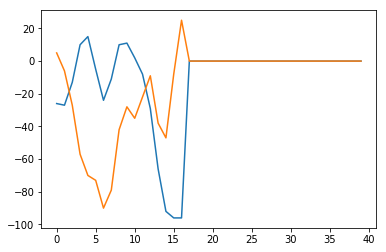

[-72 -33 -16   7  25   2  -7  11  25  21   0 -22 -41 -66   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [ 17 -13 -24 -28 -52 -83 -92 -57 -26 -38 -42 -29   6  30   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [1.3  1.34 1.38 1.42 1.46 1.5  1.54 1.58 1.62 1.66 1.7  1.74 1.78 1.82
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


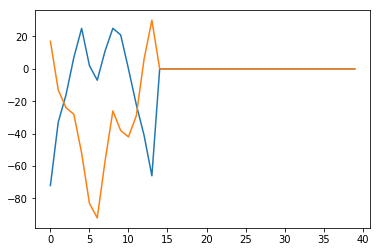

[-98 -99 -50  -4  -3 -10  19  44  14 -20   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [ 28  48  61  38  -1 -27 -32 -53 -91 -94   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [1.86 1.9  1.94 1.98 2.02 2.06 2.1  2.14 2.18 2.22 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


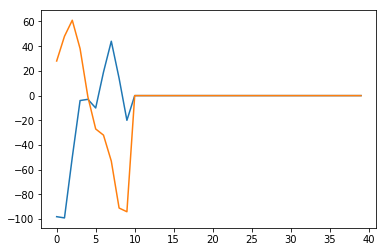

[  -2   36   29   -5  -26  -43  -72 -102  -97  -82  -85  -69  -34   16
   50    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0] [-37  12  -5 -33 -27 -20 -22   6  45  50  36  10 -12 -23 -50   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [2.26 2.3  2.34 2.38 2.42 2.46 2.5  2.55 2.59 2.63 2.67 2.71 2.75 2.79
 2.83 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


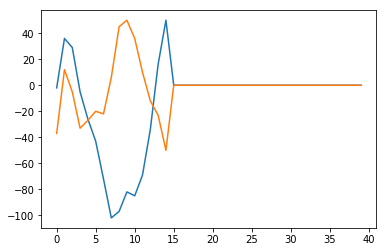

[ 29  11  17  46  47   8  -8 -17 -50 -91 -91 -75 -94 -96 -70 -44 -23 -53
 -73 -19  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [-88 -94 -84 -97 -97 -66 -42  -9  14   0   5  38  44  15 -15 -26 -32 -61
 -96 -92 -32   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [2.87 2.91 2.95 3.   3.04 3.08 3.13 3.17 3.22 3.26 3.3  3.35 3.39 3.43
 3.48 3.52 3.57 3.61 3.65 3.7  3.75 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


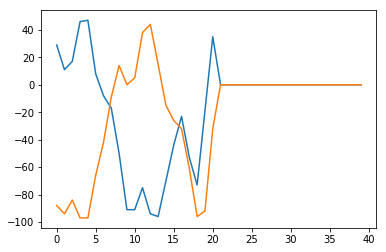

[  42   24    4  -12  -37  -72 -102  -89  -30  -18  -61  -57  -17  -15
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0] [ 13  -6 -34 -12  10 -28 -41   1  33  30   1 -15 -13 -29   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [3.79 3.84 3.88 3.92 3.96 4.01 4.05 4.1  4.14 4.19 4.24 4.28 4.32 4.37
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


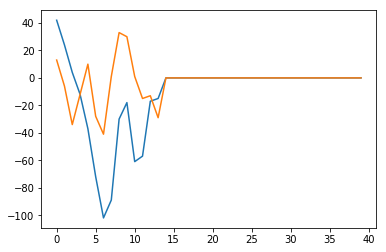

[-29 -22  -3  33   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [ -68 -100 -110 -102    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0] [4.42 4.46 4.5  4.55 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


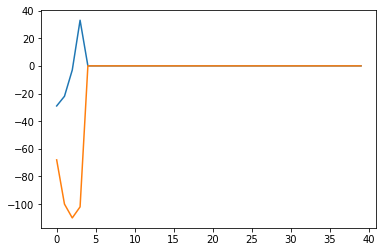

[  43   14   -1  -13  -43  -79 -101 -106  -74  -18   -5  -20    5   15
  -38  -44   18   61    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0] [-80 -55 -40  -7  33  22  -9   7  38  23 -22 -44 -45 -63 -96 -95 -79 -59
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [4.6  4.64 4.69 4.73 4.77 4.81 4.86 4.91 4.95 5.   5.04 5.09 5.13 5.17
 5.21 5.26 5.3  5.34 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


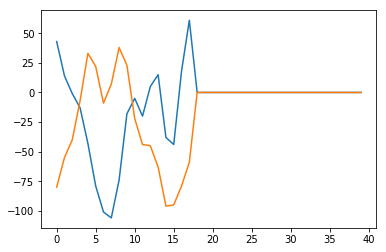

[ 57  32  11  -9 -29 -58 -94 -70  15  55   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [-30 -38 -47 -13  15   2  -1  28  46  25   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [5.39 5.43 5.47 5.52 5.57 5.61 5.65 5.69 5.73 5.77 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


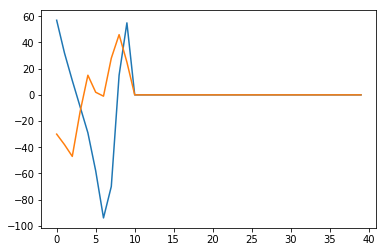

In [6]:
liste = []
compute_data(data2,liste,1)

### Deuxième découpage

Pour la deuxième solution nous avons découpé le signal en fonction de son sens de variation et de son signe. On stocke ensuite le signal découpé dans une liste.

In [7]:
def compute_data_2(data,liste,x,y,size):
    var1 = 0
    var2 = 0
    var3 = 0
    var4 = 0
    var5 = 0
    j = 0
    data4 = np.zeros((size), dtype='i')
    data5 = np.zeros((size+1), dtype='i')
    
    for i in range(data.shape[0]-1):
        if data[i,x]<0 and data[i+1,x]-data[i,x]<0 and var2 == 0:
            var1 = 1
        if data[i,x]>0 and data[i+1,x]-data[i,x]>0 and var1 == 0:
            var2 = 1

        if var1 == 1:
            data4[j] = data[i,x]
            j = j+1
            
            if j == size:
                var5 = 0
                var1 = 0
                var3 = 0
                var4 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
            
            if data[i+1,x]-data[i,x]>0:
                var5 = 1

            if data[i,x]>0 and var5 == 1:
                var3 = 1

            if data[i+1,x]-data[i,x]<0 and var3 == 1:
                var4 = 1

            if data[i,x]<0 and var4 == 1:
                print(data4)
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                data5[k] = 1
                liste.append(data5)
                var5 = 0
                var1 = 0
                var3 = 0
                var4 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')

        if var2 == 1:
            data4[j] = data[i,x]
            j = j+1
            
            if j == size:
                var5 = 0
                var2 = 0
                var3 = 0
                var4 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
            
            if data[i+1,x]-data[i,x]<0:
                var5 = 1

            if data[i,x]<0 and var5 == 1:
                var3 = 1

            if data[i+1,x]-data[i,x]>0 and var3 == 1:
                var4 = 1

            if data[i,x]>0 and var4 == 1:
                print(data4)
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                data5[k] = 0
                liste.append(data5)
                var5 = 0
                var2 = 0
                var3 = 0
                var4 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
    
    var1 = 0
    var2 = 0
    var3 = 0
    var4 = 0
    var5 = 0
    j = 0
    data4 = np.zeros((size), dtype='i')
    data5 = np.zeros((size+1), dtype='i')
    for i in range(data.shape[0]-1):
        if data[i,y]<0 and data[i+1,y]-data[i,y]<0 and var2 == 0:
            var1 = 1
        if data[i,y]>0 and data[i+1,y]-data[i,y]>0 and var1 == 0:
            var2 = 1

        if var1 == 1:
            data4[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var1 = 0
                var3 = 0
                var4 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
            
            if data[i+1,y]-data[i,y]>0:
                var5 = 1

            if data[i,y]>0 and var5 == 1:
                var3 = 1

            if data[i+1,y]-data[i,y]<0 and var3 == 1:
                var4 = 1

            if data[i,y]<0 and var4 == 1:
                print(data4)
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                data5[k] = 3
                liste.append(data5)
                var5 = 0
                var1 = 0
                var3 = 0
                var4 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')

        if var2 == 1:
            data4[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var2 = 0
                var3 = 0
                var4 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
            
            if data[i+1,y]-data[i,y]<0:
                var5 = 1

            if data[i,y]<0 and var5 == 1:
                var3 = 1

            if data[i+1,y]-data[i,y]>0 and var3 == 1:
                var4 = 1

            if data[i,y]>0 and var4 == 1:
                print(data4)
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                data5[k] = 2
                liste.append(data5)
                var5 = 0
                var2 = 0
                var3 = 0
                var4 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
    
    for i in range(len(liste)):
        rand = randint(0,len(liste)-1)
        buff = liste[rand]
        del liste[rand]
        liste.append(buff)

[ 1  1  3  4  5  6  3 -5 -7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]


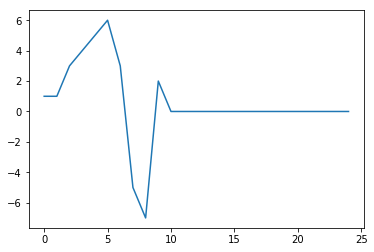

[  8   8   6   6   8   5  -6 -27 -57 -70 -73 -90 -79 -42 -28 -35 -22  -9
 -38 -47  -8  25   0   0   0   0   0   0   0   0   0   0   0   0   0]


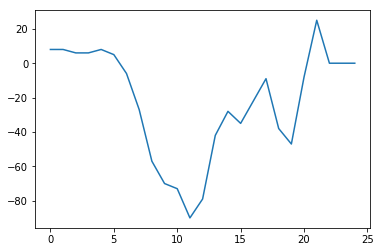

[-13 -24 -28 -52 -83 -92 -57 -26 -38 -42 -29   6  30  28  48  61  38  -1
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


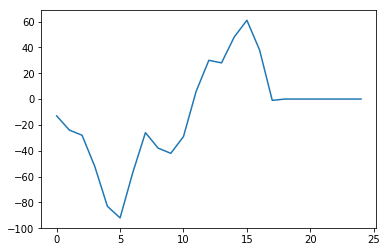

[-27 -32 -53 -91 -94 -37  12  -5   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


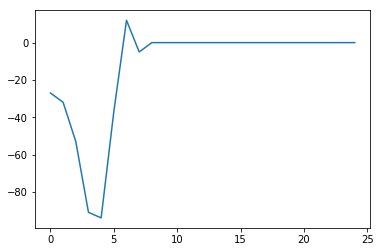

[-20 -22   6  45  50  36  10 -12   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


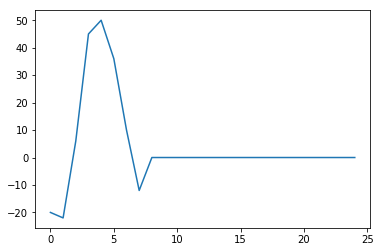

[-23 -50 -88 -94 -84 -97 -97 -66 -42  -9  14   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


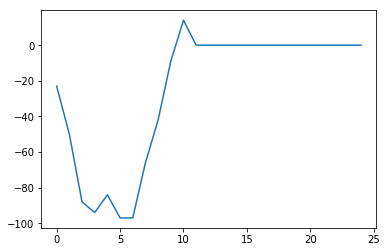

[  5  38  44  15 -15 -26 -32 -61 -96 -92 -32  13   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


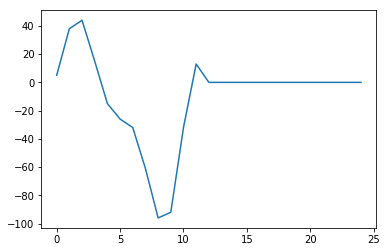

[ -6 -34 -12  10 -28   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


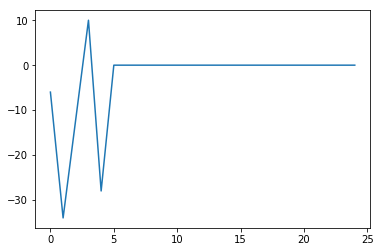

[   1   33   30    1  -15  -13  -29  -68 -100 -110 -102  -80  -55  -40
   -7   33    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


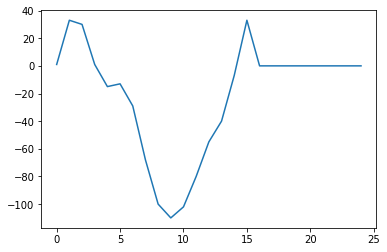

[  7  38  23 -22 -44 -45 -63 -96 -95 -79 -59 -30 -38 -47 -13  15   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


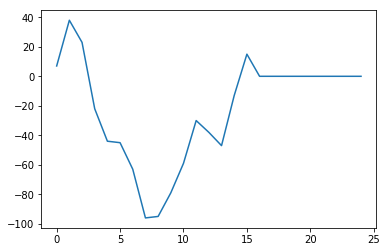

[  28   46   25  -14  -22  -19  -35  -63  -95 -111  -57   27    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


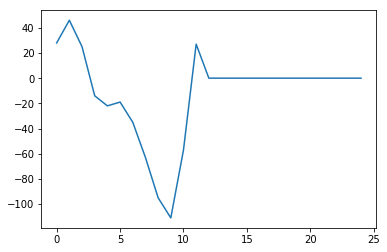

[ 1  2  3  2 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]


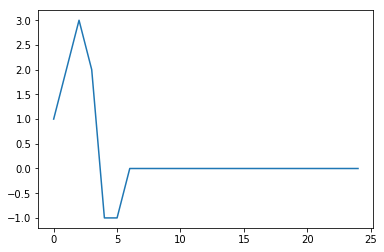

[  2   4   0  -7 -17 -26 -27 -13  10   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


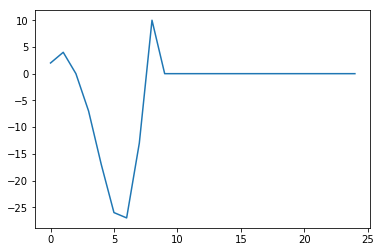

[ -5 -24 -11  10  11   2  -8   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


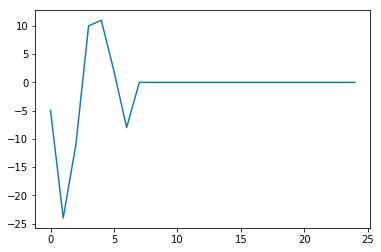

[-29 -66 -92 -96 -96 -72 -33 -16   7  25   2  -7   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


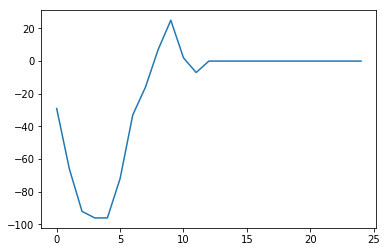

[ 11  25  21   0 -22 -41 -66 -98 -99 -50  -4  -3 -10  19   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


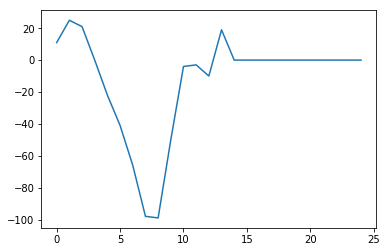

[  -5  -26  -43  -72 -102  -97  -82  -85  -69  -34   16   50   29   11
   17   46   47    8   -8    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


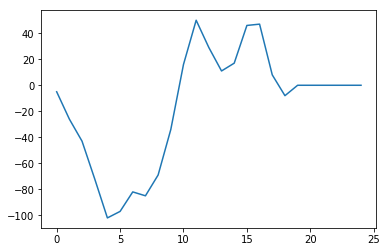

[-17 -50 -91 -91 -75 -94 -96 -70 -44 -23 -53 -73 -19  35  42  24   4 -12
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


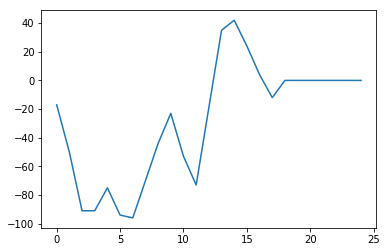

[ -37  -72 -102  -89  -30  -18  -61  -57  -17  -15  -29  -22   -3   33
   43   14   -1    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


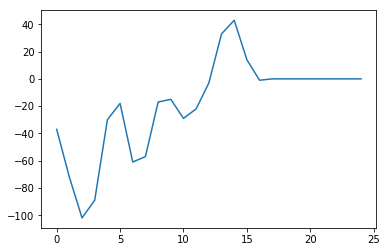

[ -13  -43  -79 -101 -106  -74  -18   -5  -20    5   15  -38    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


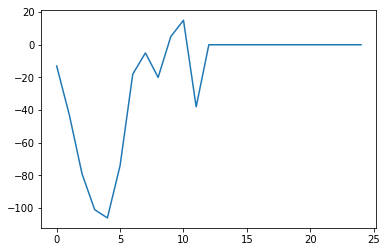

[ 18  61  57  32  11  -9 -29 -58 -94 -70  15   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


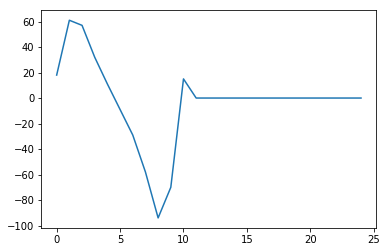

In [8]:
liste = []
compute_data_2(data2,liste,1,2,35)

### Troisième découpage

Pour notre troisième solution nous commenços par attribuer une valeur à chaque point du signal en fonction du sens de variation du signal autour de ce point et du signe de la valeur du point.

In [9]:
def delta_data(data):
    liste = []
    for i in range(1,data.shape[0]):
        if data[i]-data[i-1]>0 and data[i]>0:
            liste.append(1)
        elif data[i]-data[i-1]<0 and data[i]>0:
            liste.append(-1)
        elif data[i]-data[i-1]>0 and data[i]<0:
            liste.append(2)
        elif data[i]-data[i-1]<0 and data[i]<0:
            liste.append(-2)
        else:
            liste.append(0)
    liste.append(0)
    buff = np.array(liste)
    return buff

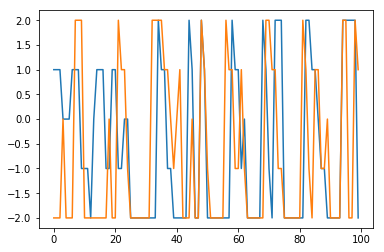

In [10]:
data[:,1]=delta_data(data[:,1])
data[:,2]=delta_data(data[:,2])

data2[:,1]=delta_data(data2[:,1])
data2[:,2]=delta_data(data2[:,2])

data10[:,0]=delta_data(data10[:,0])
data10[:,1]=delta_data(data10[:,1])

data11[:,0]=delta_data(data11[:,0])
data11[:,1]=delta_data(data11[:,1])

plt.plot(data[:100,1])
plt.plot(data[:100,2])
plt.show()

Ensuite on découpe le signal créé pour en faire une base de donnée, on stocke les données découpées dans une liste.

In [11]:
def transform_data(data,liste,x,y,size):
    var1 = 0
    var2 = 0
    var3 = 0
    var4 = 0
    var5 = 0
    var6 = 0
    j = 0
    data4 = np.zeros((size), dtype='i')
    data3 = np.zeros((size), dtype='i')
    data5 = np.zeros((2*size+1), dtype='i')
    
    for i in range(data.shape[0]):
        if data[i,x] == 1 and var2 == 0 and var3 == 0 and var4 == 0:
            var1 = 1
        if data[i,x] == -2 and var1 == 0 and var3 == 0 and var4 == 0:
            var2 = 1
        if data[i,y] == 1 and var1 == 0 and var2 == 0 and var4 == 0:
            var3 = 1
        if data[i,y] == -2 and var1 == 0 and var3 == 0 and var2 == 0:
            var4 = 1

        if var1 == 1:
            data4[j] = data[i,x]
            data3[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var1 = 0
                var6 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,y] == 1 and var6 == 0:
                var5 = 1
                
            if data[i,y] == -2 and var5 == 0:
                var6 = 1

            if data[i,y] == -2 and var5 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 0
                liste.append(data5)
                var5 = 0
                var1 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,y] == 1 and var6 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 1
                liste.append(data5)
                var5 = 0
                var1 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')

        if var2 == 1:
            data4[j] = data[i,x]
            data3[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var2 = 0
                var6 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,y] == 1 and var6 == 0:
                var5 = 1
                
            if data[i,y] == -2 and var5 == 0:
                var6 = 1

            if data[i,y] == -2 and var5 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 2
                liste.append(data5)
                var5 = 0
                var2 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,y] == 1 and var6 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 3
                liste.append(data5)
                var5 = 0
                var2 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
                
        if var3 == 1:
            data4[j] = data[i,x]
            data3[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var3 = 0
                var6 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,x] == 1 and var6 == 0:
                var5 = 1
                
            if data[i,x] == -2 and var5 == 0:
                var6 = 1

            if data[i,x] == -2 and var5 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 0
                liste.append(data5)
                var5 = 0
                var3 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,x] == 1 and var6 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 2
                liste.append(data5)
                var5 = 0
                var3 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
                
        if var4 == 1:
            data4[j] = data[i,x]
            data3[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var4 = 0
                var6 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,x] == 1 and var6 == 0:
                var5 = 1
                
            if data[i,x] == -2 and var5 == 0:
                var6 = 1

            if data[i,x] == -2 and var5 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 1
                liste.append(data5)
                var5 = 0
                var4 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,x] == 1 and var6 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 3
                liste.append(data5)
                var5 = 0
                var4 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
        
    for i in range(len(liste)):
        rand = randint(0,len(liste)-1)
        buff = liste[rand]
        del liste[rand]
        liste.append(buff)

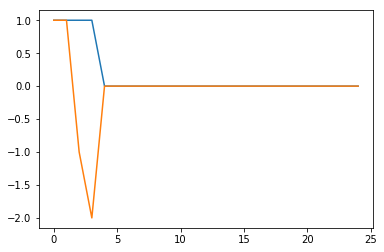

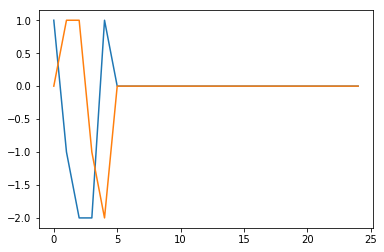

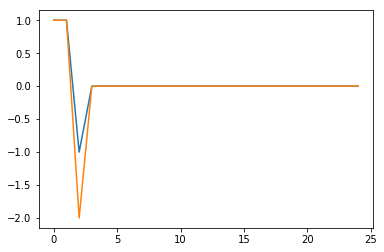

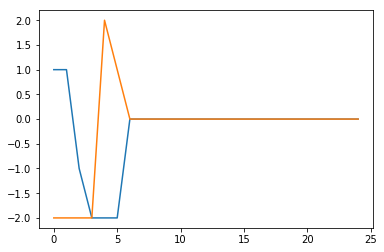

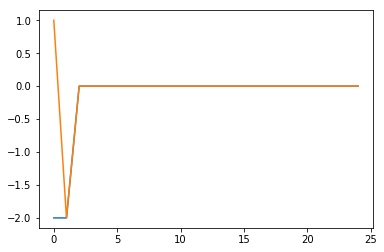

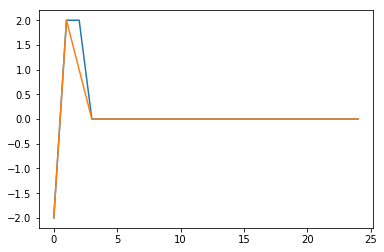

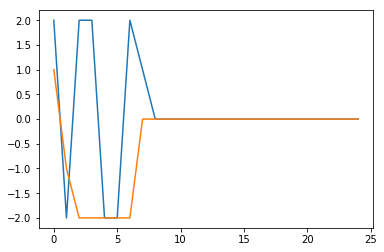

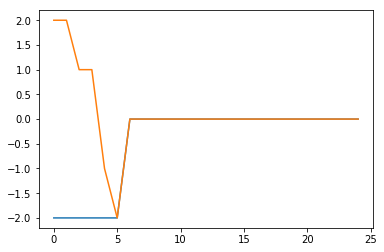

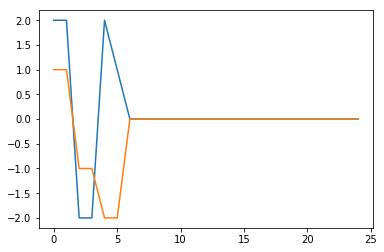

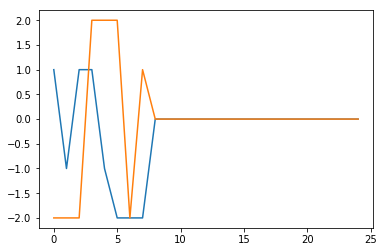

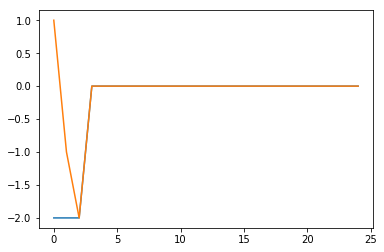

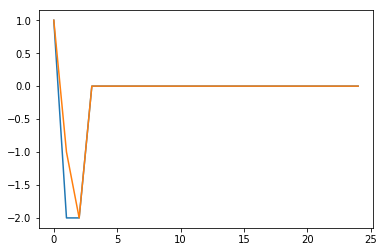

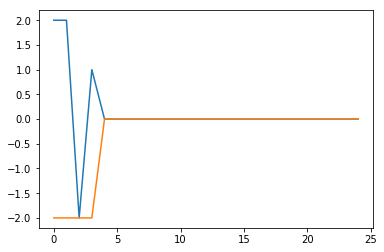

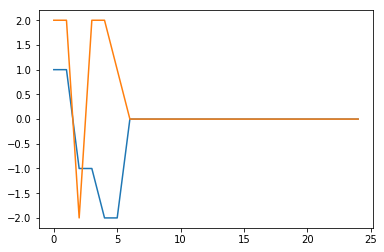

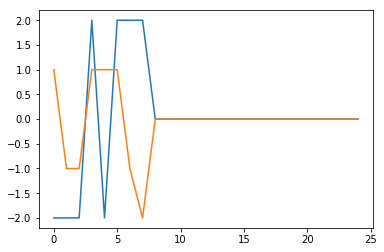

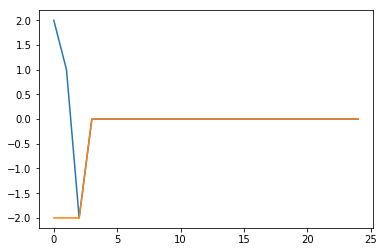

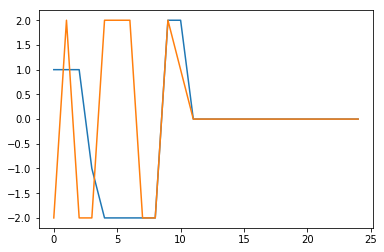

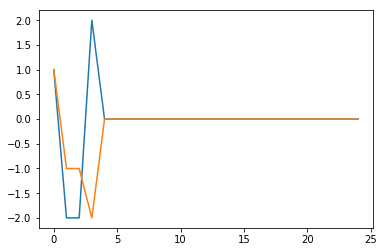

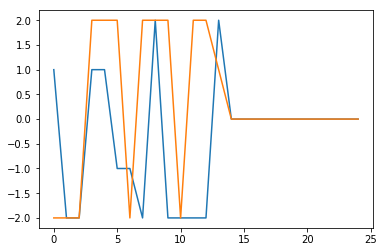

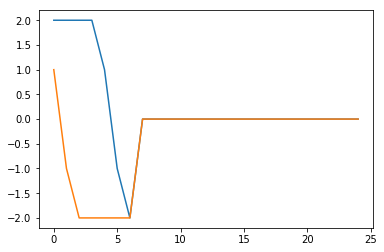

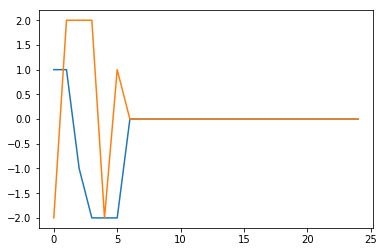

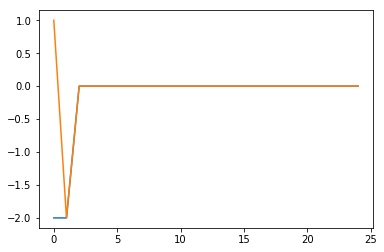

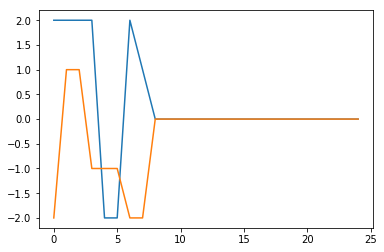

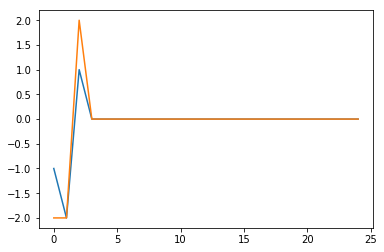

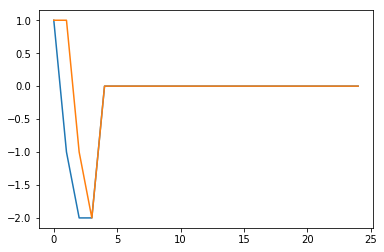

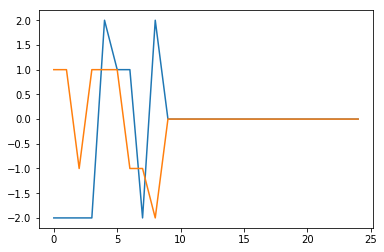

In [12]:
liste = []
transform_data(data2,liste,1,2,35)

### Quatrième découpage

Nous avons remarqué que tous les découpages précédents n'étaient pas assez précis pour permettre un entrainement optimal de notre réseau, nous avons donc du trouver une autre solution pour le découpage de nos données. Pour cela nous avons calculé la différence entre les 2 voies de notre signal afin de détecter le moment où les jambes se croisent.

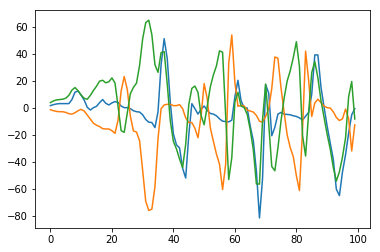

In [13]:
# On retélécharge et on lisse les données
data10 = np.loadtxt("MarcheAlex.txt")
min_G = data10[0,0]
min_D = data10[0,1]
for i in range(data10.shape[0]):
    data10[i,0] = data10[i,0]-min_G
    data10[i,1] = data10[i,1]-min_D
data11 = np.loadtxt("CourseAlex.txt")
min_G = data11[0,0]
min_D = data11[0,1]
for i in range(data11.shape[0]):
    data11[i,0] = data11[i,0]-min_G
    data11[i,1] = data11[i,1]-min_D
data = np.loadtxt("Marche.txt")
min_G = data[0,1]
min_D = data[0,2]
for i in range(data.shape[0]):
    data[i,1] = data[i,1]-min_G
    data[i,2] = data[i,2]-min_D
data2 = np.loadtxt("Course.txt")
min_G = data2[0,1]
min_D = data2[0,2]
for i in range(data2.shape[0]):
    data2[i,1] = data2[i,1]-min_G
    data2[i,2] = data2[i,2]-min_D
buff = data[:,1]
buff = lissage(buff,1)
data[:,1]=np.array(lissage(np.array(buff),1))
buff = data[:,2]
buff = lissage(buff,1)
data[:,2]=np.array(lissage(np.array(buff),1))
buff = data2[:,1]
buff = lissage(buff,1)
data2[:,1]=np.array(lissage(np.array(buff),1))
buff = data2[:,2]
buff = lissage(buff,1)
data2[:,2]=np.array(lissage(np.array(buff),1))
buff = data10[:,0]
buff = lissage(buff,1)
data10[:,0]=np.array(lissage(np.array(buff),1))
buff = data10[:,1]
buff = lissage(buff,1)
data10[:,1]=np.array(lissage(np.array(buff),1))
buff = data11[:,0]
buff = lissage(buff,1)
data11[:,0]=np.array(lissage(np.array(buff),1))
buff = data11[:,1]
buff = lissage(buff,1)
data11[:,1]=np.array(lissage(np.array(buff),1))


# Calcul des différences
diff1 = data[:,1]-data[:,2]
diff1 = np.array(lissage(diff1,1))

diff2 = data2[:,1]-data2[:,2]
diff2 = np.array(lissage(diff2,1))

diff3 = data10[:,0]-data10[:,1]
diff3 = np.array(lissage(diff3,1))

diff4 = data11[:,0]-data11[:,1]
diff4 = np.array(lissage(diff4,1))

plt.plot(data[:100,1])
plt.plot(data[:100,2])
plt.plot(diff1[:100])
plt.show()

Puis on découpe proprement les données grâce à la différence calculée précédemment:

In [14]:
def compute_by_diff(data,diff,i,j,size,liste):
    var1=0
    var2=0
    var3=0
    data4 = []
    data3 = []
    data5 = np.zeros((size), dtype='i')
    data6 = np.zeros((size), dtype='i')
    fin = False
    l=0
    for k in range(1,data.shape[0]):
        if diff[k-1]<0 and diff[k]>0 and var2==0:
            var1=1
        if diff[k-1]>0 and diff[k]<0 and var1==0:
            var2=1
            
        if var1==1:
            m = k
            while fin == False:
                data4.append(data[m,i])
                data3.append(data[m,j])
                if m == data.shape[0]-1:
                    var1 = 0
                    var3 = 0
                    fin = True
                    data4 = []
                    data3 = []
                if diff[m-1]<0 and diff[m]>0 and var3 == 1:
                    if m-k > size:
                        var1 = 0
                        var3 = 0
                        fin = True
                        data4 = []
                        data3 = []
                    else:
                        for l in range(len(data3)):
                            data5[l] = data3[l]
                        for l in range(len(data4)):
                            data6[l] = data3[l]
                        data3 = data5.tolist()
                        data4 = data6.tolist()
                        for l in range(len(data3)):
                            data4.append(data3[l])
                        buff = np.array(data4)
                        buff = np.resize(buff,(size))
                        data4 = buff.tolist()
                        data4.append(0)
                        buff = np.array(data4)
                        liste.append(buff)
                        data3 = []
                        data4 = []
                        var1 = 0
                        var3 = 0
                        data5 = np.zeros((size), dtype='i')
                        data6 = np.zeros((size), dtype='i')
                        fin = True
                if var1 == 1:
                    var3 = 1
                m = m+1
            fin = False
                
        if var2==1:
            m = k
            while fin == False: 
                data4.append(data[m,i])
                data3.append(data[m,j])
                if m == data.shape[0]-1:
                    var1 = 0
                    var3 = 0
                    fin = True
                    data4 = []
                    data3 = []
                if diff[m-1]>0 and diff[m]<0 and var3 == 1:
                    if m-k > size:
                        var1 = 0
                        var3 = 0
                        fin = True
                        data4 = []
                        data3 = []
                    else:
                        for l in range(len(data3)):
                            data5[l] = data3[l]
                        for l in range(len(data4)):
                            data6[l] = data3[l]
                        data3 = data5.tolist()
                        data4 = data6.tolist()
                        for l in range(len(data3)):
                            data4.append(data3[l])
                        buff = np.array(data4)
                        buff = np.resize(buff,(size))
                        data4 = buff.tolist()
                        data4.append(1)
                        buff = np.array(data4)
                        liste.append(buff)
                        data3 = []
                        data4 = []
                        var2 = 0
                        var3 = 0
                        data5 = np.zeros((size), dtype='i')
                        data6 = np.zeros((size), dtype='i')
                        fin = True
                if var2 == 1:
                    var3 = 1
                m = m+1
            fin = False
                
    for i in range(len(liste)):
        rand = randint(0,len(liste)-1)
        buff = liste[rand]
        del liste[rand]
        liste.append(buff)

In [15]:
liste = []
compute_by_diff(data,diff1,1,2,70,liste)
compute_by_diff(data2,diff2,1,2,70,liste)
compute_by_diff(data10,diff3,0,1,70,liste)
compute_by_diff(data11,diff4,0,1,70,liste)

## Traitement de la base de donnée

Nous allons maintenant séparé les données des capteurs des prédiction à obtenir.

In [16]:
data=np.array(liste)
features = data[:,:-1]
labels = data[:,-1:]
labels = labels.reshape((-1,)) # Juste pour rendre le print plus beau mais marche sans
print(features)
print(labels)

[[  0 -14 -29 ...   0   0   0]
 [  1   0  -1 ...   0   0   0]
 [ -6   0  14 ...   0   0   0]
 ...
 [-44 -47 -16 ...   0   0   0]
 [-14  -7 -10 ...   0   0   0]
 [-35 -13  11 ...   0   0   0]]
[0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0
 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0
 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0
 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1
 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1
 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0
 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0

Nous allons aussi définir une fonction qui séparera notre base de données en 3 nouvelles base de données servant pour l'entrainement, le test et la validation de notre réseau.

In [17]:
def split_data(features, labels):
    i = int((features.shape[0]*7)/10)
    j = int((features.shape[0]*2)/10)
    k = int((features.shape[0])/10)
    features_train = features[:i,:]
    features_train = features_train.reshape((features_train.shape[0],35,2,1))
    labels_train = labels[:i]
    features_test = features[i:i+j,:]
    features_test = features_test.reshape((features_test.shape[0],35,2,1))
    labels_test = labels[i:i+j]
    features_valid = features[-k:,:]
    features_valid = features_valid.reshape((features_valid.shape[0],35,2,1))
    labels_valid = labels[-k:]
    
    return (features_train,labels_train),(features_test,labels_test),(features_valid,labels_valid)

In [18]:
train, test, valid = split_data(features, labels)
print(train,test,valid)

(array([[[[  0],
         [-14]],

        [[-29],
         [-39]],

        [[-54],
         [-54]],

        ...,

        [[  0],
         [  0]],

        [[  0],
         [  0]],

        [[  0],
         [  0]]],


       [[[  1],
         [  0]],

        [[ -1],
         [ -2]],

        [[ -5],
         [ -9]],

        ...,

        [[  0],
         [  0]],

        [[  0],
         [  0]],

        [[  0],
         [  0]]],


       [[[ -6],
         [  0]],

        [[ 14],
         [ 37]],

        [[ 36],
         [ 14]],

        ...,

        [[  0],
         [  0]],

        [[  0],
         [  0]],

        [[  0],
         [  0]]],


       ...,


       [[[-25],
         [  5]],

        [[ 10],
         [ -7]],

        [[-19],
         [-30]],

        ...,

        [[  0],
         [  0]],

        [[  0],
         [  0]],

        [[  0],
         [  0]]],


       [[[ -2],
         [-11]],

        [[ -3],
         [ -3]],

        [[  1],
         [  1]],

   

## Réseau de neurones

Nous allons maintenant définir, entrainer et tester notre réseau de neurones.

Instructions for updating:
Use the retry module or similar alternatives.
 Epoch : 0  Loss:  0.69324565  Accuracy:  0.47926268  Accuracy Test:  0.55376345
 Epoch : 1  Loss:  0.6879302  Accuracy:  0.5975422  Accuracy Test:  0.6451613
 Epoch : 2  Loss:  0.68363076  Accuracy:  0.6144393  Accuracy Test:  0.67741936
 Epoch : 3  Loss:  0.67937565  Accuracy:  0.6175115  Accuracy Test:  0.66129035
 Epoch : 4  Loss:  0.6752121  Accuracy:  0.6298003  Accuracy Test:  0.66129035
 Epoch : 5  Loss:  0.6707732  Accuracy:  0.64208907  Accuracy Test:  0.6827957
 Epoch : 6  Loss:  0.6659911  Accuracy:  0.67588323  Accuracy Test:  0.7258065
 Epoch : 7  Loss:  0.6606668  Accuracy:  0.68817204  Accuracy Test:  0.73655915
 Epoch : 8  Loss:  0.6545531  Accuracy:  0.7066052  Accuracy Test:  0.73655915
 Epoch : 9  Loss:  0.6473977  Accuracy:  0.7127496  Accuracy Test:  0.73655915
 Epoch : 10  Loss:  0.63959324  Accuracy:  0.71735793  Accuracy Test:  0.7419355
 Epoch : 11  Loss:  0.63094974  Accuracy:  0.7235023

 Epoch : 98  Loss:  0.46445224  Accuracy:  0.8371736  Accuracy Test:  0.8064516
 Epoch : 99  Loss:  0.47179496  Accuracy:  0.8264209  Accuracy Test:  0.82258064
 Epoch : 100  Loss:  0.46709913  Accuracy:  0.8356375  Accuracy Test:  0.8064516
 Epoch : 101  Loss:  0.4797973  Accuracy:  0.8248848  Accuracy Test:  0.82258064
 Epoch : 102  Loss:  0.45937577  Accuracy:  0.8402458  Accuracy Test:  0.8172043
 Epoch : 103  Loss:  0.4547865  Accuracy:  0.84485406  Accuracy Test:  0.81182796
 Epoch : 104  Loss:  0.46082017  Accuracy:  0.84178185  Accuracy Test:  0.81182796
 Epoch : 105  Loss:  0.4777594  Accuracy:  0.8233487  Accuracy Test:  0.827957
 Epoch : 106  Loss:  0.45568895  Accuracy:  0.84792626  Accuracy Test:  0.827957
 Epoch : 107  Loss:  0.44844222  Accuracy:  0.85099846  Accuracy Test:  0.81182796
 Epoch : 108  Loss:  0.45228678  Accuracy:  0.8463902  Accuracy Test:  0.81182796
 Epoch : 109  Loss:  0.46887723  Accuracy:  0.8325653  Accuracy Test:  0.7903226
 Epoch : 110  Loss:  0.49

 Epoch : 200  Loss:  0.42661095  Accuracy:  0.875576  Accuracy Test:  0.8494624
 Epoch : 201  Loss:  0.4090001  Accuracy:  0.9032258  Accuracy Test:  0.8548387
 Epoch : 202  Loss:  0.41069806  Accuracy:  0.9047619  Accuracy Test:  0.84408605
 Epoch : 203  Loss:  0.41617796  Accuracy:  0.8955453  Accuracy Test:  0.8494624
 Epoch : 204  Loss:  0.40525422  Accuracy:  0.906298  Accuracy Test:  0.8763441
 Epoch : 205  Loss:  0.41623586  Accuracy:  0.9016897  Accuracy Test:  0.84408605
 Epoch : 206  Loss:  0.42680395  Accuracy:  0.88325655  Accuracy Test:  0.86021507
 Epoch : 207  Loss:  0.40585333  Accuracy:  0.9078341  Accuracy Test:  0.8494624
 Epoch : 208  Loss:  0.40322703  Accuracy:  0.9155146  Accuracy Test:  0.8548387
 Epoch : 209  Loss:  0.4137569  Accuracy:  0.8986175  Accuracy Test:  0.83870965
 Epoch : 210  Loss:  0.4303859  Accuracy:  0.89093703  Accuracy Test:  0.8172043
 Epoch : 211  Loss:  0.43440044  Accuracy:  0.86789554  Accuracy Test:  0.8494624
 Epoch : 212  Loss:  0.409

 Epoch : 301  Loss:  0.38927445  Accuracy:  0.92626727  Accuracy Test:  0.87096775
 Epoch : 302  Loss:  0.38612872  Accuracy:  0.92933947  Accuracy Test:  0.83870965
 Epoch : 303  Loss:  0.38989976  Accuracy:  0.9247312  Accuracy Test:  0.8655914
 Epoch : 304  Loss:  0.41333035  Accuracy:  0.90015364  Accuracy Test:  0.86021507
 Epoch : 305  Loss:  0.45271617  Accuracy:  0.85099846  Accuracy Test:  0.87096775
 Epoch : 306  Loss:  0.42161524  Accuracy:  0.8894009  Accuracy Test:  0.8763441
 Epoch : 307  Loss:  0.4052618  Accuracy:  0.9093702  Accuracy Test:  0.87096775
 Epoch : 308  Loss:  0.3930659  Accuracy:  0.92012286  Accuracy Test:  0.87096775
 Epoch : 309  Loss:  0.38172975  Accuracy:  0.9308756  Accuracy Test:  0.8548387
 Epoch : 310  Loss:  0.38013285  Accuracy:  0.9324117  Accuracy Test:  0.86021507
 Epoch : 311  Loss:  0.38469476  Accuracy:  0.9278034  Accuracy Test:  0.84408605
 Epoch : 312  Loss:  0.39087644  Accuracy:  0.92626727  Accuracy Test:  0.8655914
 Epoch : 313  Lo

 Epoch : 403  Loss:  0.39364886  Accuracy:  0.921659  Accuracy Test:  0.84408605
 Epoch : 404  Loss:  0.42041275  Accuracy:  0.8847926  Accuracy Test:  0.86021507
 Epoch : 405  Loss:  0.37703803  Accuracy:  0.9416283  Accuracy Test:  0.8924731
 Epoch : 406  Loss:  0.3759892  Accuracy:  0.9416283  Accuracy Test:  0.86021507
 Epoch : 407  Loss:  0.36857072  Accuracy:  0.94623655  Accuracy Test:  0.8817204
 Epoch : 408  Loss:  0.36758667  Accuracy:  0.9477727  Accuracy Test:  0.8763441
 Epoch : 409  Loss:  0.38631025  Accuracy:  0.9308756  Accuracy Test:  0.8763441
 Epoch : 410  Loss:  0.37718308  Accuracy:  0.94009215  Accuracy Test:  0.8548387
 Epoch : 411  Loss:  0.37004215  Accuracy:  0.9447005  Accuracy Test:  0.87096775
 Epoch : 412  Loss:  0.3889727  Accuracy:  0.9185868  Accuracy Test:  0.87096775
 Epoch : 413  Loss:  0.36750567  Accuracy:  0.9477727  Accuracy Test:  0.8763441
 Epoch : 414  Loss:  0.38241965  Accuracy:  0.9278034  Accuracy Test:  0.8655914
 Epoch : 415  Loss:  0.3

 Epoch : 505  Loss:  0.35757902  Accuracy:  0.96006143  Accuracy Test:  0.8817204
 Epoch : 506  Loss:  0.35660863  Accuracy:  0.96006143  Accuracy Test:  0.8763441
 Epoch : 507  Loss:  0.35603106  Accuracy:  0.96159756  Accuracy Test:  0.8817204
 Epoch : 508  Loss:  0.35565156  Accuracy:  0.96159756  Accuracy Test:  0.8763441
 Epoch : 509  Loss:  0.3551076  Accuracy:  0.96313363  Accuracy Test:  0.88709676
 Epoch : 510  Loss:  0.35462528  Accuracy:  0.96159756  Accuracy Test:  0.8763441
 Epoch : 511  Loss:  0.35432366  Accuracy:  0.96313363  Accuracy Test:  0.8817204
 Epoch : 512  Loss:  0.35968637  Accuracy:  0.95545316  Accuracy Test:  0.8655914
 Epoch : 513  Loss:  0.37822512  Accuracy:  0.9339478  Accuracy Test:  0.87096775
 Epoch : 514  Loss:  0.38139108  Accuracy:  0.9339478  Accuracy Test:  0.88709676
 Epoch : 515  Loss:  0.36059937  Accuracy:  0.95238096  Accuracy Test:  0.8655914
 Epoch : 516  Loss:  0.35759404  Accuracy:  0.96006143  Accuracy Test:  0.88709676
 Epoch : 517  L

 Epoch : 606  Loss:  0.3513114  Accuracy:  0.96466976  Accuracy Test:  0.87096775
 Epoch : 607  Loss:  0.35144052  Accuracy:  0.96620584  Accuracy Test:  0.8924731
 Epoch : 608  Loss:  0.3526048  Accuracy:  0.96006143  Accuracy Test:  0.8548387
 Epoch : 609  Loss:  0.35786602  Accuracy:  0.9569892  Accuracy Test:  0.8494624
 Epoch : 610  Loss:  0.41915968  Accuracy:  0.8894009  Accuracy Test:  0.8763441
 Epoch : 611  Loss:  0.39451888  Accuracy:  0.9124424  Accuracy Test:  0.8763441
 Epoch : 612  Loss:  0.36546725  Accuracy:  0.94930875  Accuracy Test:  0.8763441
 Epoch : 613  Loss:  0.35677382  Accuracy:  0.9569892  Accuracy Test:  0.8817204
 Epoch : 614  Loss:  0.3584229  Accuracy:  0.95238096  Accuracy Test:  0.8763441
 Epoch : 615  Loss:  0.3561175  Accuracy:  0.95852536  Accuracy Test:  0.87096775
 Epoch : 616  Loss:  0.35507572  Accuracy:  0.95852536  Accuracy Test:  0.8817204
 Epoch : 617  Loss:  0.35552755  Accuracy:  0.96006143  Accuracy Test:  0.8817204
 Epoch : 618  Loss:  0

 Epoch : 708  Loss:  0.3466285  Accuracy:  0.96927804  Accuracy Test:  0.9032258
 Epoch : 709  Loss:  0.34696603  Accuracy:  0.96927804  Accuracy Test:  0.8924731
 Epoch : 710  Loss:  0.34658545  Accuracy:  0.96927804  Accuracy Test:  0.89784944
 Epoch : 711  Loss:  0.34645998  Accuracy:  0.96927804  Accuracy Test:  0.89784944
 Epoch : 712  Loss:  0.3464224  Accuracy:  0.96927804  Accuracy Test:  0.89784944
 Epoch : 713  Loss:  0.34637657  Accuracy:  0.96927804  Accuracy Test:  0.89784944
 Epoch : 714  Loss:  0.34643158  Accuracy:  0.96927804  Accuracy Test:  0.9032258
 Epoch : 715  Loss:  0.34624505  Accuracy:  0.96927804  Accuracy Test:  0.9032258
 Epoch : 716  Loss:  0.34618637  Accuracy:  0.96927804  Accuracy Test:  0.89784944
 Epoch : 717  Loss:  0.34620145  Accuracy:  0.96927804  Accuracy Test:  0.89784944
 Epoch : 718  Loss:  0.34613523  Accuracy:  0.96927804  Accuracy Test:  0.89784944
 Epoch : 719  Loss:  0.34610605  Accuracy:  0.96927804  Accuracy Test:  0.9032258
 Epoch : 72

 Epoch : 810  Loss:  0.39236984  Accuracy:  0.9185868  Accuracy Test:  0.88709676
 Epoch : 811  Loss:  0.35892588  Accuracy:  0.95238096  Accuracy Test:  0.8655914
 Epoch : 812  Loss:  0.389012  Accuracy:  0.92626727  Accuracy Test:  0.87096775
 Epoch : 813  Loss:  0.3620617  Accuracy:  0.953917  Accuracy Test:  0.87096775
 Epoch : 814  Loss:  0.3603345  Accuracy:  0.95545316  Accuracy Test:  0.88709676
 Epoch : 815  Loss:  0.34953666  Accuracy:  0.96466976  Accuracy Test:  0.8817204
 Epoch : 816  Loss:  0.349134  Accuracy:  0.9677419  Accuracy Test:  0.8763441
 Epoch : 817  Loss:  0.3800187  Accuracy:  0.92933947  Accuracy Test:  0.9086022
 Epoch : 818  Loss:  0.34884176  Accuracy:  0.96620584  Accuracy Test:  0.8763441
 Epoch : 819  Loss:  0.34746546  Accuracy:  0.9677419  Accuracy Test:  0.9086022
 Epoch : 820  Loss:  0.34849313  Accuracy:  0.96620584  Accuracy Test:  0.88709676
 Epoch : 821  Loss:  0.34604126  Accuracy:  0.96927804  Accuracy Test:  0.89784944
 Epoch : 822  Loss:  0

 Epoch : 912  Loss:  0.35421824  Accuracy:  0.95852536  Accuracy Test:  0.88709676
 Epoch : 913  Loss:  0.34452817  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 914  Loss:  0.34403598  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 915  Loss:  0.3440206  Accuracy:  0.9708141  Accuracy Test:  0.88709676
 Epoch : 916  Loss:  0.3441198  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 917  Loss:  0.34389707  Accuracy:  0.9708141  Accuracy Test:  0.88709676
 Epoch : 918  Loss:  0.3438482  Accuracy:  0.9708141  Accuracy Test:  0.89784944
 Epoch : 919  Loss:  0.34372118  Accuracy:  0.9708141  Accuracy Test:  0.89784944
 Epoch : 920  Loss:  0.34369507  Accuracy:  0.9708141  Accuracy Test:  0.89784944
 Epoch : 921  Loss:  0.34368846  Accuracy:  0.9708141  Accuracy Test:  0.88709676
 Epoch : 922  Loss:  0.343775  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 923  Loss:  0.3436435  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 924  Loss:  0.343

 Epoch : 1013  Loss:  0.34410584  Accuracy:  0.9708141  Accuracy Test:  0.88709676
 Epoch : 1014  Loss:  0.34382603  Accuracy:  0.9708141  Accuracy Test:  0.8817204
 Epoch : 1015  Loss:  0.3438232  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 1016  Loss:  0.34376448  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 1017  Loss:  0.34364516  Accuracy:  0.9708141  Accuracy Test:  0.8817204
 Epoch : 1018  Loss:  0.34371334  Accuracy:  0.9708141  Accuracy Test:  0.88709676
 Epoch : 1019  Loss:  0.34358683  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 1020  Loss:  0.34355047  Accuracy:  0.9708141  Accuracy Test:  0.8817204
 Epoch : 1021  Loss:  0.3436835  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 1022  Loss:  0.34351674  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 1023  Loss:  0.34349546  Accuracy:  0.9708141  Accuracy Test:  0.89784944
 Epoch : 1024  Loss:  0.3434509  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 1025  L

 Epoch : 1113  Loss:  0.3429905  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 1114  Loss:  0.34237298  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1115  Loss:  0.34227797  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1116  Loss:  0.34231856  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1117  Loss:  0.3422846  Accuracy:  0.97235024  Accuracy Test:  0.8817204
 Epoch : 1118  Loss:  0.34260154  Accuracy:  0.9708141  Accuracy Test:  0.89784944
 Epoch : 1119  Loss:  0.3424732  Accuracy:  0.97235024  Accuracy Test:  0.8817204
 Epoch : 1120  Loss:  0.34255624  Accuracy:  0.9708141  Accuracy Test:  0.89784944
 Epoch : 1121  Loss:  0.34358817  Accuracy:  0.9708141  Accuracy Test:  0.88709676
 Epoch : 1122  Loss:  0.34419638  Accuracy:  0.9708141  Accuracy Test:  0.88709676
 Epoch : 1123  Loss:  0.34604433  Accuracy:  0.96620584  Accuracy Test:  0.8817204
 Epoch : 1124  Loss:  0.34831038  Accuracy:  0.96620584  Accuracy Test:  0.8817204
 Epoch :

 Epoch : 1213  Loss:  0.36726457  Accuracy:  0.9477727  Accuracy Test:  0.88709676
 Epoch : 1214  Loss:  0.353186  Accuracy:  0.96006143  Accuracy Test:  0.89784944
 Epoch : 1215  Loss:  0.34532428  Accuracy:  0.96927804  Accuracy Test:  0.89784944
 Epoch : 1216  Loss:  0.34374917  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 1217  Loss:  0.34499356  Accuracy:  0.96927804  Accuracy Test:  0.9032258
 Epoch : 1218  Loss:  0.34380805  Accuracy:  0.9708141  Accuracy Test:  0.8924731
 Epoch : 1219  Loss:  0.34396768  Accuracy:  0.96927804  Accuracy Test:  0.89784944
 Epoch : 1220  Loss:  0.34294736  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1221  Loss:  0.34471115  Accuracy:  0.96927804  Accuracy Test:  0.9032258
 Epoch : 1222  Loss:  0.34296837  Accuracy:  0.97235024  Accuracy Test:  0.89784944
 Epoch : 1223  Loss:  0.3432156  Accuracy:  0.9708141  Accuracy Test:  0.9032258
 Epoch : 1224  Loss:  0.34267798  Accuracy:  0.97235024  Accuracy Test:  0.9032258
 Epoch

 Epoch : 1313  Loss:  0.34165558  Accuracy:  0.97235024  Accuracy Test:  0.9086022
 Epoch : 1314  Loss:  0.34166402  Accuracy:  0.97235024  Accuracy Test:  0.9032258
 Epoch : 1315  Loss:  0.34164628  Accuracy:  0.97235024  Accuracy Test:  0.9032258
 Epoch : 1316  Loss:  0.3416537  Accuracy:  0.97235024  Accuracy Test:  0.9086022
 Epoch : 1317  Loss:  0.34164336  Accuracy:  0.97235024  Accuracy Test:  0.89784944
 Epoch : 1318  Loss:  0.34163055  Accuracy:  0.97235024  Accuracy Test:  0.89784944
 Epoch : 1319  Loss:  0.34167865  Accuracy:  0.97235024  Accuracy Test:  0.9032258
 Epoch : 1320  Loss:  0.34162316  Accuracy:  0.97235024  Accuracy Test:  0.9032258
 Epoch : 1321  Loss:  0.3416338  Accuracy:  0.97235024  Accuracy Test:  0.89784944
 Epoch : 1322  Loss:  0.34177914  Accuracy:  0.97235024  Accuracy Test:  0.9032258
 Epoch : 1323  Loss:  0.34161803  Accuracy:  0.97235024  Accuracy Test:  0.89784944
 Epoch : 1324  Loss:  0.34179357  Accuracy:  0.97235024  Accuracy Test:  0.9086022
 E

 Epoch : 1413  Loss:  0.3415346  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1414  Loss:  0.34146652  Accuracy:  0.97235024  Accuracy Test:  0.9086022
 Epoch : 1415  Loss:  0.34144834  Accuracy:  0.97235024  Accuracy Test:  0.9086022
 Epoch : 1416  Loss:  0.34144086  Accuracy:  0.97235024  Accuracy Test:  0.9086022
 Epoch : 1417  Loss:  0.34142256  Accuracy:  0.97235024  Accuracy Test:  0.9032258
 Epoch : 1418  Loss:  0.34141964  Accuracy:  0.97235024  Accuracy Test:  0.9086022
 Epoch : 1419  Loss:  0.34142515  Accuracy:  0.97235024  Accuracy Test:  0.9032258
 Epoch : 1420  Loss:  0.3415117  Accuracy:  0.97235024  Accuracy Test:  0.9086022
 Epoch : 1421  Loss:  0.34141865  Accuracy:  0.97235024  Accuracy Test:  0.9086022
 Epoch : 1422  Loss:  0.3414131  Accuracy:  0.97235024  Accuracy Test:  0.9032258
 Epoch : 1423  Loss:  0.34141436  Accuracy:  0.97235024  Accuracy Test:  0.9032258
 Epoch : 1424  Loss:  0.34141535  Accuracy:  0.97235024  Accuracy Test:  0.9086022
 Epoch 

 Epoch : 1513  Loss:  0.34126908  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1514  Loss:  0.34126765  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1515  Loss:  0.34126505  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1516  Loss:  0.34126443  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1517  Loss:  0.34128594  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1518  Loss:  0.3412702  Accuracy:  0.97235024  Accuracy Test:  0.89784944
 Epoch : 1519  Loss:  0.34127018  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1520  Loss:  0.3412612  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1521  Loss:  0.34125972  Accuracy:  0.97235024  Accuracy Test:  0.89784944
 Epoch : 1522  Loss:  0.3412582  Accuracy:  0.97235024  Accuracy Test:  0.89784944
 Epoch : 1523  Loss:  0.3412578  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1524  Loss:  0.34134984  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoc

 Epoch : 1613  Loss:  0.3411615  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1614  Loss:  0.34116372  Accuracy:  0.97235024  Accuracy Test:  0.89784944
 Epoch : 1615  Loss:  0.3411431  Accuracy:  0.97235024  Accuracy Test:  0.89784944
 Epoch : 1616  Loss:  0.34115827  Accuracy:  0.97235024  Accuracy Test:  0.89784944
 Epoch : 1617  Loss:  0.34113872  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1618  Loss:  0.34109235  Accuracy:  0.97235024  Accuracy Test:  0.88709676
 Epoch : 1619  Loss:  0.34102434  Accuracy:  0.97235024  Accuracy Test:  0.88709676
 Epoch : 1620  Loss:  0.34092203  Accuracy:  0.97235024  Accuracy Test:  0.88709676
 Epoch : 1621  Loss:  0.3407394  Accuracy:  0.97235024  Accuracy Test:  0.88709676
 Epoch : 1622  Loss:  0.34041408  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epoch : 1623  Loss:  0.3404844  Accuracy:  0.97235024  Accuracy Test:  0.8924731
 Epoch : 1624  Loss:  0.3401987  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epo

 Epoch : 1713  Loss:  0.33996192  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epoch : 1714  Loss:  0.33996397  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 1715  Loss:  0.33994138  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 1716  Loss:  0.3399336  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 1717  Loss:  0.33992812  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 1718  Loss:  0.3399267  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 1719  Loss:  0.33992684  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epoch : 1720  Loss:  0.3399696  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 1721  Loss:  0.3399087  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 1722  Loss:  0.33990362  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 1723  Loss:  0.33989772  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 1724  Loss:  0.3399273  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 172

 Epoch : 1813  Loss:  0.33971527  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 1814  Loss:  0.33971128  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 1815  Loss:  0.3397103  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 1816  Loss:  0.33970436  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 1817  Loss:  0.33976537  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 1818  Loss:  0.33972064  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 1819  Loss:  0.33970517  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 1820  Loss:  0.3397014  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 1821  Loss:  0.33970138  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 1822  Loss:  0.3397006  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 1823  Loss:  0.33972642  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 1824  Loss:  0.33969966  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 1825  Loss

 Epoch : 1915  Loss:  0.33962876  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 1916  Loss:  0.3396276  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 1917  Loss:  0.3396268  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 1918  Loss:  0.33962548  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 1919  Loss:  0.33962426  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 1920  Loss:  0.33962348  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 1921  Loss:  0.3396219  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 1922  Loss:  0.33962142  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 1923  Loss:  0.33962032  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 1924  Loss:  0.33961955  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 1925  Loss:  0.33961767  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 1926  Loss:  0.33961675  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 1927  L

 Epoch : 2015  Loss:  0.33957672  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2016  Loss:  0.33960718  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2017  Loss:  0.33958152  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2018  Loss:  0.33957958  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2019  Loss:  0.33957088  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2020  Loss:  0.33957008  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2021  Loss:  0.33956915  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 2022  Loss:  0.33957478  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2023  Loss:  0.33956984  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 2024  Loss:  0.33957866  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 2025  Loss:  0.33956882  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 2026  Loss:  0.3395679  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2027

 Epoch : 2115  Loss:  0.33959267  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 2116  Loss:  0.3395912  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epoch : 2117  Loss:  0.33959067  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epoch : 2118  Loss:  0.3395901  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epoch : 2119  Loss:  0.33958906  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epoch : 2120  Loss:  0.33958474  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epoch : 2121  Loss:  0.3395863  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epoch : 2122  Loss:  0.33958167  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epoch : 2123  Loss:  0.3395813  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epoch : 2124  Loss:  0.33958054  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epoch : 2125  Loss:  0.3395781  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 2126  Loss:  0.33957782  Accuracy:  0.9738863  Accuracy Test:  0.8924731
 Epoch : 2127  Loss

 Epoch : 2215  Loss:  0.3395317  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2216  Loss:  0.3395316  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2217  Loss:  0.33953398  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2218  Loss:  0.33953425  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2219  Loss:  0.33953467  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2220  Loss:  0.3395327  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2221  Loss:  0.33953178  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2222  Loss:  0.33953017  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2223  Loss:  0.33952972  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2224  Loss:  0.33952948  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2225  Loss:  0.33952892  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2226  Loss:  0.33952853  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2227  Loss

 Epoch : 2317  Loss:  0.33953142  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2318  Loss:  0.33952263  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2319  Loss:  0.33951554  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2320  Loss:  0.3395158  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2321  Loss:  0.33951405  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2322  Loss:  0.33951217  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2323  Loss:  0.3395102  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2324  Loss:  0.33950928  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2325  Loss:  0.33963063  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2326  Loss:  0.3395389  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2327  Loss:  0.33952856  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2328  Loss:  0.33952695  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2329  Loss

 Epoch : 2419  Loss:  0.3394889  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2420  Loss:  0.33948937  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2421  Loss:  0.33948937  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2422  Loss:  0.33948958  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2423  Loss:  0.33948794  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2424  Loss:  0.33948752  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2425  Loss:  0.33948714  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2426  Loss:  0.33948815  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2427  Loss:  0.33948776  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2428  Loss:  0.3394881  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2429  Loss:  0.33948714  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2430  Loss:  0.33948624  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2431  Los

 Epoch : 2521  Loss:  0.33947387  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2522  Loss:  0.33947396  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2523  Loss:  0.33947334  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 2524  Loss:  0.33948454  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 2525  Loss:  0.33948395  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2526  Loss:  0.33947325  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2527  Loss:  0.3394744  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2528  Loss:  0.33947298  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2529  Loss:  0.339472  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2530  Loss:  0.33947167  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2531  Loss:  0.33947197  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2532  Loss:  0.33947146  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2533  Lo

 Epoch : 2622  Loss:  0.3394628  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2623  Loss:  0.3394625  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2624  Loss:  0.3394624  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2625  Loss:  0.3394623  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2626  Loss:  0.33946267  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2627  Loss:  0.33946243  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2628  Loss:  0.33946273  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2629  Loss:  0.33946255  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2630  Loss:  0.33946294  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2631  Loss:  0.33946368  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2632  Loss:  0.33946353  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2633  Loss:  0.33946383  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 2634  Loss:

 Epoch : 2724  Loss:  0.3394538  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 2725  Loss:  0.33945465  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 2726  Loss:  0.3394553  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 2727  Loss:  0.339454  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2728  Loss:  0.3394538  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2729  Loss:  0.33945325  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2730  Loss:  0.33945307  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2731  Loss:  0.33945304  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2732  Loss:  0.33945307  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2733  Loss:  0.3394529  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2734  Loss:  0.33945265  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2735  Loss:  0.33945262  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2736  Loss

 Epoch : 2826  Loss:  0.3394462  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2827  Loss:  0.33944646  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2828  Loss:  0.33944628  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2829  Loss:  0.33944628  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2830  Loss:  0.3394465  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2831  Loss:  0.33944637  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2832  Loss:  0.3394459  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2833  Loss:  0.3394475  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2834  Loss:  0.33944672  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2835  Loss:  0.33944666  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2836  Loss:  0.33944684  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2837  Loss:  0.33944666  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2838  Loss:

 Epoch : 2928  Loss:  0.33944234  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2929  Loss:  0.33944234  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2930  Loss:  0.3394427  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2931  Loss:  0.33944196  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2932  Loss:  0.3394418  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2933  Loss:  0.33944166  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2934  Loss:  0.33944148  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2935  Loss:  0.3394415  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2936  Loss:  0.3394413  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2937  Loss:  0.33944124  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2938  Loss:  0.33944115  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2939  Loss:  0.339441  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 2940  Loss:  

 Epoch : 3030  Loss:  0.33943555  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3031  Loss:  0.33943543  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3032  Loss:  0.33943534  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3033  Loss:  0.33943543  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3034  Loss:  0.3394351  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3035  Loss:  0.33943498  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3036  Loss:  0.33943507  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3037  Loss:  0.33943498  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3038  Loss:  0.33943534  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3039  Loss:  0.33943516  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3040  Loss:  0.3394351  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3041  Loss:  0.33943504  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3042  Los

 Epoch : 3131  Loss:  0.3394328  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3132  Loss:  0.33943242  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3133  Loss:  0.33943194  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3134  Loss:  0.33943248  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3135  Loss:  0.33943227  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3136  Loss:  0.33943182  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3137  Loss:  0.3394314  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3138  Loss:  0.33943132  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3139  Loss:  0.33943203  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3140  Loss:  0.33943188  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3141  Loss:  0.33943096  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3142  Loss:  0.33943093  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3143  Los

 Epoch : 3232  Loss:  0.33942732  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3233  Loss:  0.33942717  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3234  Loss:  0.33942735  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3235  Loss:  0.3394272  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3236  Loss:  0.33942708  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3237  Loss:  0.33942708  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3238  Loss:  0.33942708  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3239  Loss:  0.33942708  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3240  Loss:  0.339427  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3241  Loss:  0.33942696  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3242  Loss:  0.33942705  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3243  Loss:  0.33942688  Accuracy:  0.9738863  Accuracy Test:  0.89784944
 Epoch : 3244  Los

 Epoch : 3332  Loss:  0.33942914  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3333  Loss:  0.33942991  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3334  Loss:  0.33942923  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3335  Loss:  0.33942947  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3336  Loss:  0.33942938  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3337  Loss:  0.3394292  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3338  Loss:  0.33942905  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3339  Loss:  0.33942887  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 3340  Loss:  0.33942875  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3341  Loss:  0.33942887  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3342  Loss:  0.33942866  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 3343  Loss:  0.33942857  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3344  

 Epoch : 3433  Loss:  0.33942357  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3434  Loss:  0.3394235  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3435  Loss:  0.33942354  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3436  Loss:  0.33942348  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3437  Loss:  0.33942342  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 3438  Loss:  0.33942342  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 3439  Loss:  0.33942342  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 3440  Loss:  0.33942336  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 3441  Loss:  0.3394233  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3442  Loss:  0.33942318  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 3443  Loss:  0.33942327  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 3444  Loss:  0.3394231  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 3445  Loss

 Epoch : 3534  Loss:  0.33941996  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3535  Loss:  0.33941996  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3536  Loss:  0.33942008  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3537  Loss:  0.33942002  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3538  Loss:  0.33942008  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3539  Loss:  0.33942017  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3540  Loss:  0.33942023  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3541  Loss:  0.3394201  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3542  Loss:  0.33941993  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3543  Loss:  0.33941978  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3544  Loss:  0.33941972  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3545  Loss:  0.33941954  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3546  Lo

 Epoch : 3634  Loss:  0.3394424  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 3635  Loss:  0.33944222  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 3636  Loss:  0.33944198  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 3637  Loss:  0.33944187  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 3638  Loss:  0.33944175  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 3639  Loss:  0.33944157  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 3640  Loss:  0.33944157  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 3641  Loss:  0.33944115  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 3642  Loss:  0.339441  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 3643  Loss:  0.33944082  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 3644  Loss:  0.33944073  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 3645  Loss:  0.33944082  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch 

 Epoch : 3734  Loss:  0.33945683  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3735  Loss:  0.3394556  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3736  Loss:  0.33945453  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3737  Loss:  0.33945218  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3738  Loss:  0.3394512  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3739  Loss:  0.33945048  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3740  Loss:  0.3394479  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3741  Loss:  0.33944625  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 3742  Loss:  0.3394445  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 3743  Loss:  0.33944374  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 3744  Loss:  0.33944312  Accuracy:  0.9738863  Accuracy Test:  0.8817204
 Epoch : 3745  Loss:  0.3394426  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3746  Loss: 

 Epoch : 3836  Loss:  0.33942643  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3837  Loss:  0.3394264  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3838  Loss:  0.33942634  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3839  Loss:  0.33942622  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3840  Loss:  0.3394261  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3841  Loss:  0.33942613  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3842  Loss:  0.33942613  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3843  Loss:  0.3394261  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3844  Loss:  0.339426  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3845  Loss:  0.33942586  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3846  Loss:  0.33942592  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3847  Loss:  0.33942688  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 3848  Loss: 

 Epoch : 3936  Loss:  0.3394202  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 3937  Loss:  0.33942014  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 3938  Loss:  0.33942008  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 3939  Loss:  0.33942  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 3940  Loss:  0.33942002  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 3941  Loss:  0.33941996  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 3942  Loss:  0.3394199  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 3943  Loss:  0.33941993  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 3944  Loss:  0.33941984  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 3945  Loss:  0.33941978  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 3946  Loss:  0.33941984  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 3947  Loss:  0.33941975  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 

 Epoch : 4036  Loss:  0.33941585  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 4037  Loss:  0.3394159  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 4038  Loss:  0.3394159  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 4039  Loss:  0.3394158  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 4040  Loss:  0.33941573  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 4041  Loss:  0.33941567  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 4042  Loss:  0.33941558  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 4043  Loss:  0.33941555  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 4044  Loss:  0.33941543  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 4045  Loss:  0.3394154  Accuracy:  0.9738863  Accuracy Test:  0.87096775
 Epoch : 4046  Loss:  0.33941534  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 4047  Loss:  0.3394153  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 40

 Epoch : 4138  Loss:  0.33941206  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 4139  Loss:  0.33941197  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 4140  Loss:  0.33941194  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 4141  Loss:  0.33941194  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 4142  Loss:  0.3394118  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 4143  Loss:  0.3394118  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 4144  Loss:  0.33941182  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 4145  Loss:  0.33941165  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 4146  Loss:  0.33941165  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 4147  Loss:  0.33941194  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 4148  Loss:  0.33941206  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 4149  Loss:  0.33941245  Accuracy:  0.9738863  Accuracy Test:  0.8763441
 Epoch : 4150  Los

 Epoch : 4238  Loss:  0.33942583  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4239  Loss:  0.3394257  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4240  Loss:  0.33942568  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4241  Loss:  0.33942556  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4242  Loss:  0.33942556  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4243  Loss:  0.33942547  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4244  Loss:  0.33942562  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4245  Loss:  0.33942536  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4246  Loss:  0.33942556  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4247  Loss:  0.3394258  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4248  Loss:  0.3394253  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4249  Loss:  0.33942568  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch 

 Epoch : 4338  Loss:  0.33941787  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4339  Loss:  0.33941785  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4340  Loss:  0.33941776  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4341  Loss:  0.33941776  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4342  Loss:  0.3394177  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4343  Loss:  0.33941767  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4344  Loss:  0.33941746  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4345  Loss:  0.33941737  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4346  Loss:  0.33941728  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4347  Loss:  0.33941734  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4348  Loss:  0.33941722  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4349  Loss:  0.3394171  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch

 Epoch : 4438  Loss:  0.33941492  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4439  Loss:  0.33941486  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4440  Loss:  0.33941483  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4441  Loss:  0.33941486  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4442  Loss:  0.33941475  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4443  Loss:  0.3394147  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4444  Loss:  0.3394146  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4445  Loss:  0.33941445  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4446  Loss:  0.3394143  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4447  Loss:  0.33941445  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4448  Loss:  0.3394143  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4449  Loss:  0.3394142  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 

 Epoch : 4538  Loss:  0.3394062  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4539  Loss:  0.33940595  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4540  Loss:  0.33940622  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4541  Loss:  0.3394059  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4542  Loss:  0.33940592  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4543  Loss:  0.3394056  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4544  Loss:  0.33940545  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4545  Loss:  0.3394053  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4546  Loss:  0.33940497  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4547  Loss:  0.33940464  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4548  Loss:  0.33940446  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4549  Loss:  0.33940452  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch :

 Epoch : 4638  Loss:  0.33843204  Accuracy:  0.97542244  Accuracy Test:  0.88709676
 Epoch : 4639  Loss:  0.33858207  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4640  Loss:  0.33839312  Accuracy:  0.97542244  Accuracy Test:  0.88709676
 Epoch : 4641  Loss:  0.33858928  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4642  Loss:  0.33839083  Accuracy:  0.97542244  Accuracy Test:  0.88709676
 Epoch : 4643  Loss:  0.33835745  Accuracy:  0.97542244  Accuracy Test:  0.88709676
 Epoch : 4644  Loss:  0.3384225  Accuracy:  0.97542244  Accuracy Test:  0.88709676
 Epoch : 4645  Loss:  0.33833808  Accuracy:  0.97542244  Accuracy Test:  0.88709676
 Epoch : 4646  Loss:  0.33835405  Accuracy:  0.97542244  Accuracy Test:  0.88709676
 Epoch : 4647  Loss:  0.33877322  Accuracy:  0.9738863  Accuracy Test:  0.88709676
 Epoch : 4648  Loss:  0.33840963  Accuracy:  0.97542244  Accuracy Test:  0.88709676
 Epoch : 4649  Loss:  0.33837852  Accuracy:  0.97542244  Accuracy Test:  0.88709

 Epoch : 4738  Loss:  0.33809248  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4739  Loss:  0.33804443  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4740  Loss:  0.3380437  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4741  Loss:  0.3380378  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4742  Loss:  0.33803704  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4743  Loss:  0.3380339  Accuracy:  0.97542244  Accuracy Test:  0.8763441
 Epoch : 4744  Loss:  0.33806503  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4745  Loss:  0.3380343  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4746  Loss:  0.33803183  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4747  Loss:  0.33803615  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4748  Loss:  0.33804223  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4749  Loss:  0.33802965  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch :

 Epoch : 4838  Loss:  0.33797556  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4839  Loss:  0.33797115  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4840  Loss:  0.33797142  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4841  Loss:  0.33797368  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4842  Loss:  0.3379709  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4843  Loss:  0.33799174  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4844  Loss:  0.3379707  Accuracy:  0.97542244  Accuracy Test:  0.8763441
 Epoch : 4845  Loss:  0.33796877  Accuracy:  0.97542244  Accuracy Test:  0.8763441
 Epoch : 4846  Loss:  0.3379685  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4847  Loss:  0.3379695  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4848  Loss:  0.33796775  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4849  Loss:  0.33796734  Accuracy:  0.97542244  Accuracy Test:  0.8763441
 Epoch :

 Epoch : 4938  Loss:  0.33794832  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4939  Loss:  0.33794722  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4940  Loss:  0.3379483  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4941  Loss:  0.33795142  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4942  Loss:  0.33794647  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4943  Loss:  0.33794624  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4944  Loss:  0.3379458  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4945  Loss:  0.33794618  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4946  Loss:  0.33794555  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4947  Loss:  0.33794484  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4948  Loss:  0.33794498  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch : 4949  Loss:  0.33794636  Accuracy:  0.97542244  Accuracy Test:  0.8817204
 Epoch

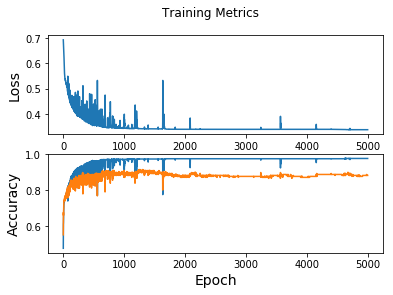

In [19]:
# Initialiser les Placeholders
x = tf.placeholder(tf.float32, shape=(None, 35, 2, 1))
y = tf.placeholder(tf.int64, shape=(None))
dropout_prob = tf.placeholder(tf.float32)
step = tf.placeholder(tf.int64)

#The layers of the neural network
conv_1 = tf.layers.conv2d(inputs= x,filters=4, kernel_size=6, padding="SAME",strides=[1,1], activation=tf.nn.relu)
#pool1 = tf.nn.max_pool(conv_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool1")
conv_2 = tf.layers.conv2d(inputs=conv_1,filters=8, kernel_size=5, padding="SAME",strides=[2, 2], activation=tf.nn.relu)
pool2 = tf.nn.max_pool(conv_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool2")

conv_3 = tf.layers.conv2d(inputs=pool2,filters=16, kernel_size=5, padding="SAME",strides=[1, 1], activation=tf.nn.relu)
conv_4 = tf.layers.conv2d(inputs=conv_3,filters=32, kernel_size=4, padding="SAME",strides=[2, 2], activation=tf.nn.relu)
pool4 = tf.nn.max_pool(conv_4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool4")
shape = pool4.get_shape().as_list()
reshaped = tf.reshape(pool4, shape=[-1, shape[1] * shape[2] * shape[3]])
dense1 = tf.contrib.layers.fully_connected(reshaped, 185 ,activation_fn=tf.nn.relu,scope='dense1')
dropout = tf.nn.dropout(dense1,dropout_prob)
logits = tf.contrib.layers.fully_connected(dropout, 2 ,activation_fn=None,scope='dense2')
softmax = tf.nn.softmax(logits, name = "Out")

with tf.name_scope("Loss"):
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=softmax, name=None)
    loss = tf.reduce_mean(cross_entropy)
    
with tf.name_scope("Train"):
    learning_rate = 0.077 + tf.train.exponential_decay(0.093,step,5000,1/math.e)
    train_op = tf.train.GradientDescentOptimizer(learning_rate= learning_rate).minimize(loss)
    
with tf.name_scope("accuracy"):
    # Convert logits to label indexes
    prediction = tf.argmax(softmax, 1)
    num_correct_prediction = tf.equal(prediction, y)
    accuracy = tf.reduce_mean(tf.cast(num_correct_prediction, tf.float32))
    
## Note: Rerunning this cell uses the same model variables
train_loss_results = []
train_accuracy_results = []
test_accuracy_results = []

# Initilize the Session
sess = tf.Session()

# Initialize the model's variables
sess.run(tf.global_variables_initializer())

for i in range(5000):
    ### Votre code
    loss_val, accuracy_val = sess.run([loss,accuracy], feed_dict={x: train[0], y: train[1], dropout_prob: 1})
    sess.run(train_op, feed_dict={x: train[0], y: train[1], step: i, dropout_prob: 0.75})
     ### Votre Code
    # On récupère le taux de prédiction sur les données test
    test_accuracy_val = sess.run([accuracy], feed_dict={x: test[0], y: test[1], dropout_prob: 1})[0]

    print(" Epoch :", i," Loss: ", loss_val," Accuracy: ", accuracy_val," Accuracy Test: ",test_accuracy_val)

    train_loss_results.append(loss_val)
    train_accuracy_results.append(accuracy_val)
    test_accuracy_results.append(test_accuracy_val)
            
# Plot the evolution of loss and train accuracy
fig, axes = plt.subplots(2)
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
axes[1].plot(test_accuracy_results)
plt.show()

Il faut maintenant faire la prédiction à partir de la base de donnée de validation.

In [20]:
predictions = sess.run([prediction], feed_dict={x: valid[0], dropout_prob: 1.0})[0]
test_accuracy_val = sess.run([accuracy], feed_dict={x: valid[0], y: valid[1], dropout_prob: 1})[0]
print (predictions)
print(valid[1])
print(test_accuracy_val)

[0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1
 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0]
[0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1
 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0]
0.8064516
